In [2]:
!git clone https://github.com/SkalskiP/yolov9.git
%cd yolov9
!pip install -r requirements.txt -q

Cloning into 'yolov9'...
remote: Enumerating objects: 325, done.
remote: Total 325 (delta 0), reused 0 (delta 0), pack-reused 325 (from 1)
Receiving objects: 100% (325/325), 2.25 MiB | 23.00 MiB/s, done.
Resolving deltas: 100% (162/162), done.
/content/yolov9
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 40.9 MB/s eta 0:00:00


In [3]:
!pip install -q roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.7 MB/s eta 0:00:00


In [4]:
import roboflow

from IPython.display import Image

In [5]:
!mkdir -p {HOME}/weights

In [ ]:
!mkdir -p {HOME}/data

In [ ]:
%cd {HOME}/yolov9


from roboflow import Roboflow
rf = Roboflow(api_key="RXP0Rth6cJFpYHJZ61wy")
project = rf.workspace("id-card-53tam").project("shelf-life-prediction")
version = project.version(4)
dataset = version.download("yolov9")



/content/yolov9
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to shelf-life-prediction-4 in yolov9:: 100%|██████████| 18578/18578 [00:04<00:00, 4246.40it/s]


In [ ]:
%cd {HOME}/yolov9

!python train.py \
--batch 16 --epochs 10 --img 640 --device 0 --min-items 0 --close-mosaic 15 \
--data /content/yolov9/shelf/data.yaml \
--weights {HOME}/weights/gelan-c.pt \
--cfg models/detect/gelan-c.yaml \
--hyp hyp.scratch-high.yaml

/content/yolov9
2024-10-19 11:44:37.249618: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-19 11:44:37.269732: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-19 11:44:37.275631: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-19 11:44:37.289736: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-19 11:44:38.659712: W tensorf

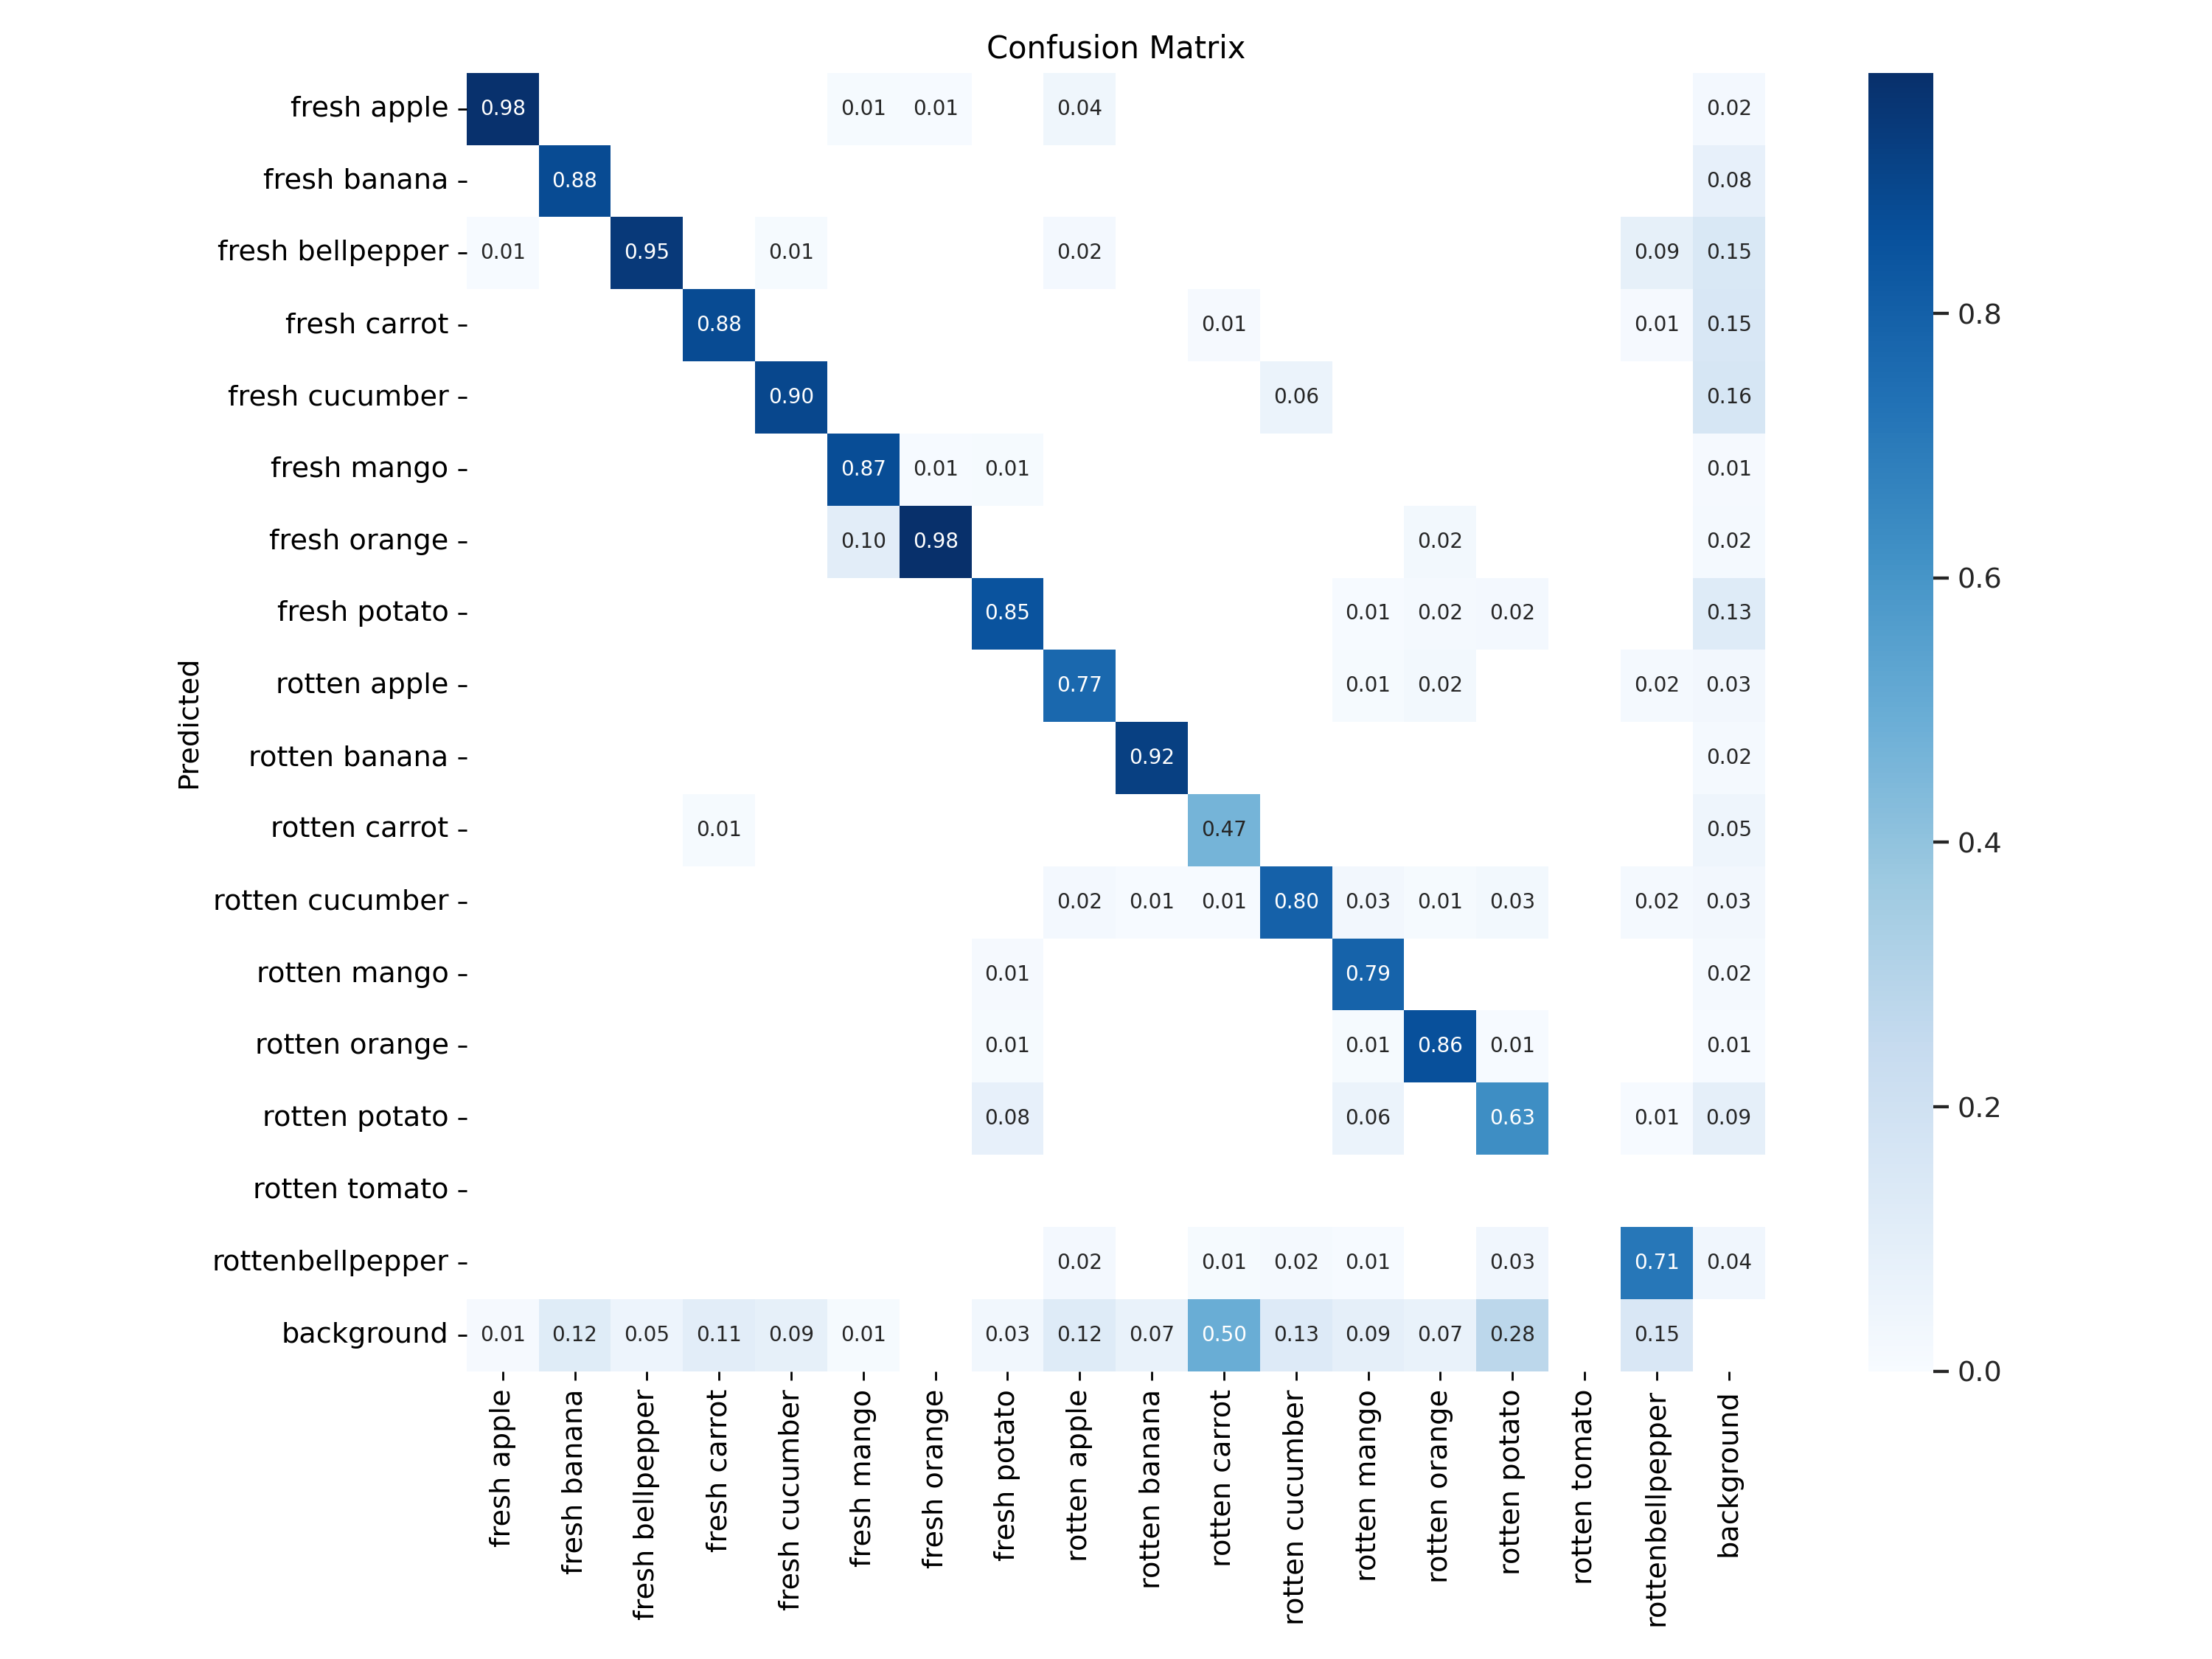

In [ ]:
Image(filename=f"{HOME}/yolov9/runs/train/exp/confusion_matrix.png", width=1000)

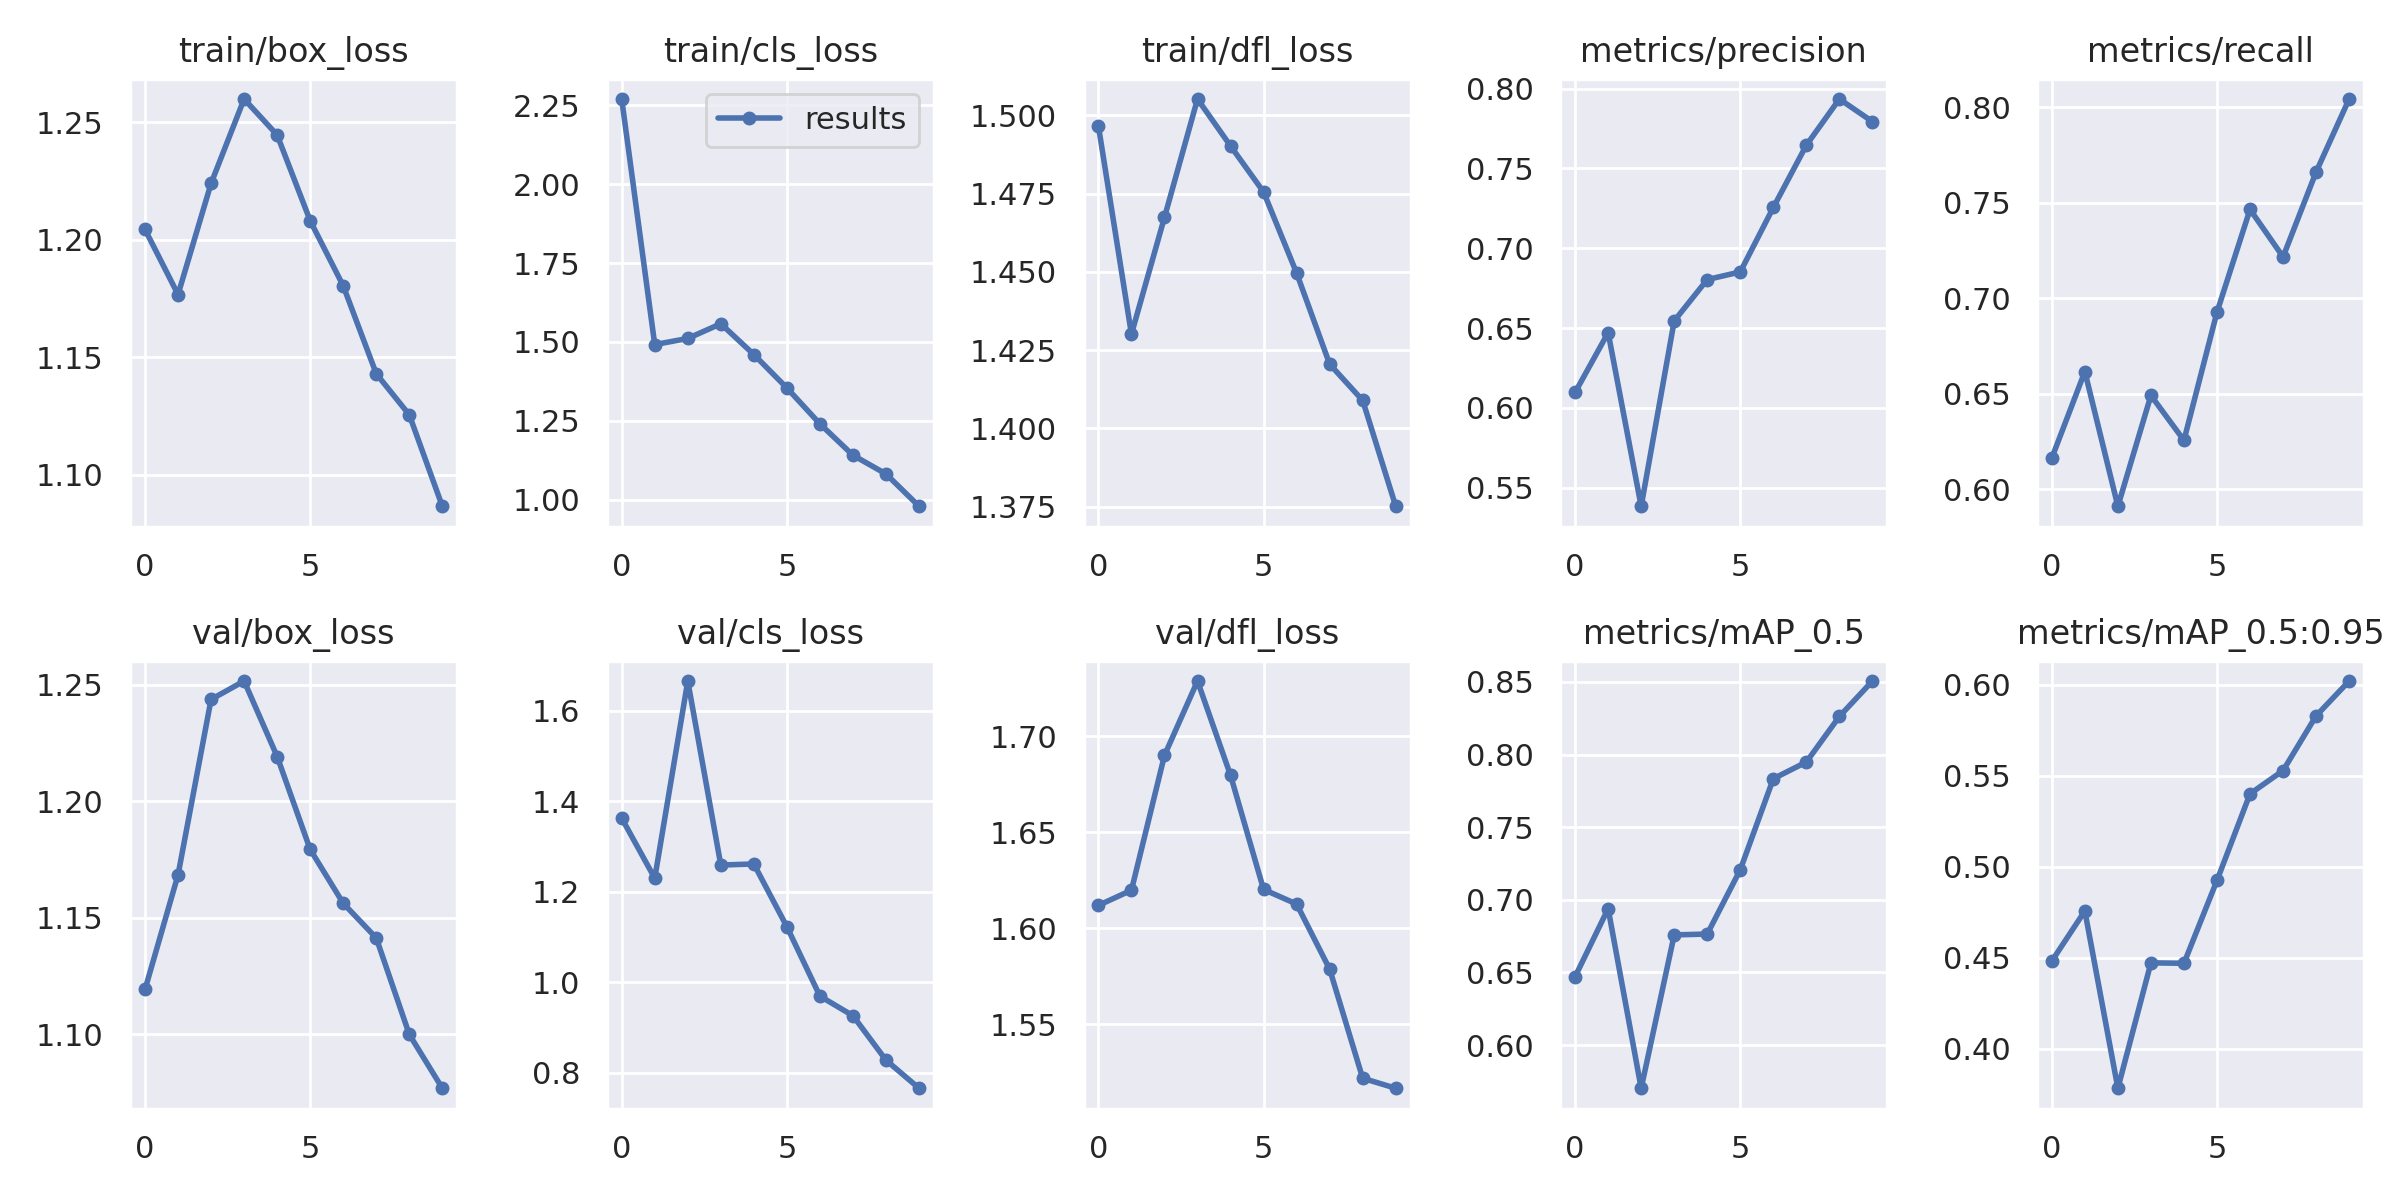

In [ ]:
Image(filename=f"{HOME}/yolov9/runs/train/exp/results.png", width=1000)

In [9]:
!python detect.py --weights /content/weights/best.pt --conf 0.1 --source /content/data/test.jpg --device cpu

detect: weights=['/content/weights/best.pt'], source=/content/data/test.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=cpu, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.4.1+cu121 CPU

/content/yolov9/models/experimental.py:75: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True

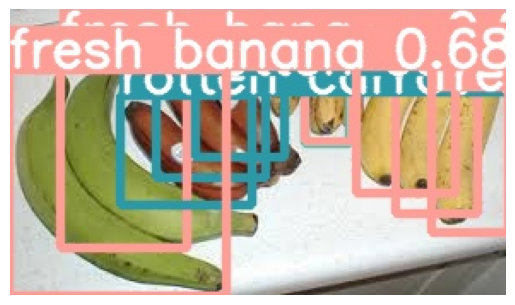

In [ ]:
#The image is
import matplotlib.pyplot as plt
import cv2

# Load the image using OpenCV
image_path = '/content/data/test.png'  # Replace with your image path
image = cv2.imread(image_path)

# Convert BGR (OpenCV default) to RGB for displaying correctly
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib
plt.imshow(image_rgb)
plt.axis('off')  # Hide axes
plt.show()


In [23]:
import torch

model = torch.hub.load('ultralytics/yolov5', 'yolov5s') 

source = '/content/data/test.jpg'

results = model(source)

detections = results.xyxy[0].cpu().numpy()

detections_list = []
for detection in detections:
    x1, y1, x2, y2, conf, class_id = detection
    detections_list.append({
        'x1': float(x1),
        'y1': float(y1),
        'x2': float(x2),
        'y2': float(y2),
        'confidence': float(conf),
        'class_id': int(class_id)
    })

print(f"\n\nItem Count : {len(detections_list)}")


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-10-20 Python-3.10.12 torch-2.4.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.




Item Count : 10
